# Generating Lego Bricks with Diffusion
Dataset used: lego-brick-images from joosthazelzet on Kaggle

In [ ]:
# import torch
from torch import Tensor
from torch.utils.data import Dataset, random_split
import torchvision.transforms as transforms

from matplotlib import pyplot as plt

import numpy as np
import os
import kagglehub

## Data
Download and create the Dataset

In [2]:
path = kagglehub.dataset_download("joosthazelzet/lego-brick-images")

print("Path to dataset files:", path)

100%|██████████| 1.00G/1.00G [00:24<00:00, 43.1MB/s]

Extracting files...


Path to dataset files: /home/pedro/.cache/kagglehub/datasets/joosthazelzet/lego-brick-images/versions/4


In [15]:

class lego(Dataset):
    
    def __init__(self, images:list[str], source_dir:str, transforms:transforms =None, classes: dict=None):
        np.random.shuffle(images)
        self.classes = classes if classes is not None else {}
        self.num_classes = 0 if self.classes is None else len(self.classes)
        self.dataset_x = []
        self.dataset_y = []
        self.transforms = transforms
        
        for name in images:
            temp = name.split()
            self.dataset_x.append(f"{source_dir}{name}")
            image_class = "_".join(temp[1:-1])
                        
            if (image_class not in self.classes):
                self.classes[image_class] = self.num_classes
                self.num_classes += 1
            self.dataset_y.append(self.classes[image_class])
        
    def __getitem__(self, idx):
        image = plt.imread(self.dataset_x[idx])
        if self.transforms is not None:
            image = self.transforms(image)
        return image, self.dataset_y[idx]

    def __len__(self):
        return len(self.dataset_x)

In [43]:
trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Grayscale(),
    transforms.Resize([128,128])

])

In [ ]:
source_dir=path + "/dataset/"
images = os.listdir(source_dir)

Lego_dataset = lego(images, source_dir, trans)

In [74]:
train, val = random_split(Lego_dataset, [0.8,0.2])
len(train)

32000

### A little fnct to show easily images

In [68]:
from torch import cat
def show_images(images_tensor: Tensor):
    n_dims = images_tensor.dim()
    
    if n_dims in (2,3):
        x_cat = images_tensor

    elif n_dims == 4:
        x_list = [img for img in images_tensor]
        x_cat = cat(x_list,dim=2)
    
    else:
        raise SyntaxError("The dimensions of images_tensor must be between 2 and 4")

    if n_dims != 2:
        if x_cat.shape[0] == 1:
            plt.imshow(x_cat.movedim(0,-1),cmap="gray");
        else:
            plt.imshow(x_cat.movedim(0,-1));
    else:
        plt.imshow(x_cat,cmap="gray");

In [70]:
from torch import concat
def show_images_list(images_list:list[Tensor]) -> None:

    images_tensor = concat(images_list,dim=0)

    # return images_tensor
    show_images(images_tensor.unsqueeze(1))

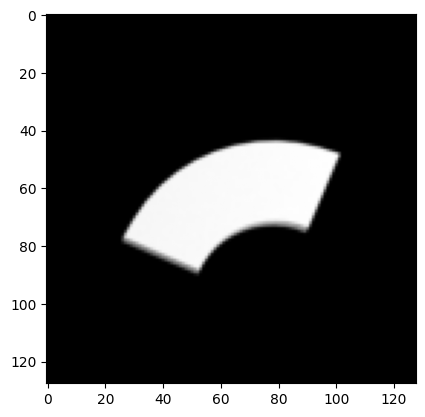

In [72]:
show_images(train[23650][0])

## Preparing images to the net

In [75]:
#   Create the Dataloader
from torch.utils.data import DataLoader
batch_size = 256

train_dataloader = DataLoader(
    train,
    batch_size=batch_size,
    shuffle=True
)

val_dataloader = DataLoader(
    val,
    batch_size=batch_size,
    shuffle=True
)


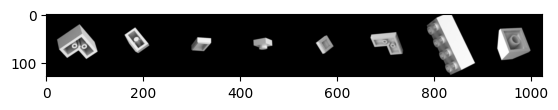

In [77]:
show_images(next(iter(train_dataloader))[0][:8])